In [43]:
# Heavily based on Lecture 18's Jupyter Notebook
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Poisson
import matplotlib.pyplot as plt

In [16]:
galaxy_df = pd.read_csv('galaxy.txt', sep=' ')

In [17]:
galaxy_df.reset_index(inplace=True)

In [18]:
galaxy_df = pd.melt(galaxy_df, id_vars='index', value_vars=['-1.56', '-1.44', '-1.31', '-1.19', '-1.06', '-0.94', '-0.81',
       '-0.69', '-0.56', '-0.44', '-0.31', '-0.19', '-0.06', '0.06', '0.19'])

In [19]:
galaxy_df.rename(columns={'index':'magnitude', 'variable':'redshift'}, inplace=True)

In [20]:
galaxy_df['redshift'] = pd.to_numeric(galaxy_df['redshift'])
galaxy_df['magnitude'] = pd.to_numeric(galaxy_df['magnitude'])

In [21]:
galaxy_df['r_2'] = galaxy_df['redshift'] ** 2
galaxy_df['m_2'] = galaxy_df['magnitude'] ** 2
galaxy_df['rm'] = galaxy_df['redshift'] * galaxy_df['magnitude']

In [22]:
poi_fit = Poisson(galaxy_df['value'], galaxy_df[['redshift', 'magnitude', 'r_2', 'm_2', 'rm']]).fit()

Optimization terminated successfully.
         Current function value: 1.246094
         Iterations 9


In [23]:
galaxy_df['poi_predict'] = poi_fit.predict()

### a) Get Poisson fit

In [27]:
galaxy_df.head(10)

,magnitude,redshift,value,r_2,m_2,rm,poi_predict
0,21.38,-1.56,1,2.4336,457.1044,-33.3528,2.463143
1,21.13,-1.56,3,2.4336,446.4769,-32.9628,2.103188
2,20.88,-1.56,3,2.4336,435.9744,-32.5728,1.814467
3,20.63,-1.56,1,2.4336,425.5969,-32.1828,1.581620
4,20.38,-1.56,1,2.4336,415.3444,-31.7928,1.392957
5,20.13,-1.56,3,2.4336,405.2169,-31.4028,1.239527
6,19.88,-1.56,2,2.4336,395.2144,-31.0128,1.114439
7,19.63,-1.56,4,2.4336,385.3369,-30.6228,1.012369
8,19.38,-1.56,1,2.4336,375.5844,-30.2328,0.929189
9,19.13,-1.56,1,2.4336,365.9569,-29.8428,0.861691


### b) Plot Poisson deviance residuals

In [28]:
def poi_deviance(true_val, est_val):

    dev = 2 * true_val * ((est_val/true_val - 1) - np.log(est_val/true_val) ) 
    
    return dev

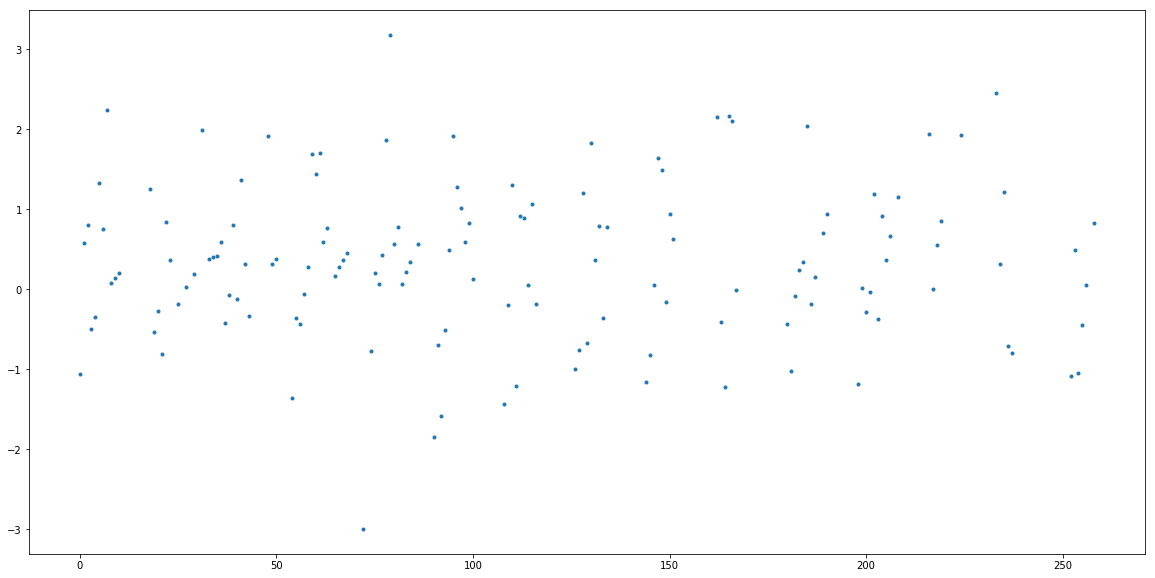

In [44]:
galaxy_df['deviance'] = poi_deviance(galaxy_df['value'], galaxy_df['poi_predict'])
galaxy_df['deviance_resid'] = np.sign(galaxy_df['value'] - galaxy_df['poi_predict']) *  np.sqrt(galaxy_df['deviance'])
plt.figure(figsize=(20,10))
plt.plot(galaxy_df['deviance_resid'], '.')

### c) Where does the fit seem poor?

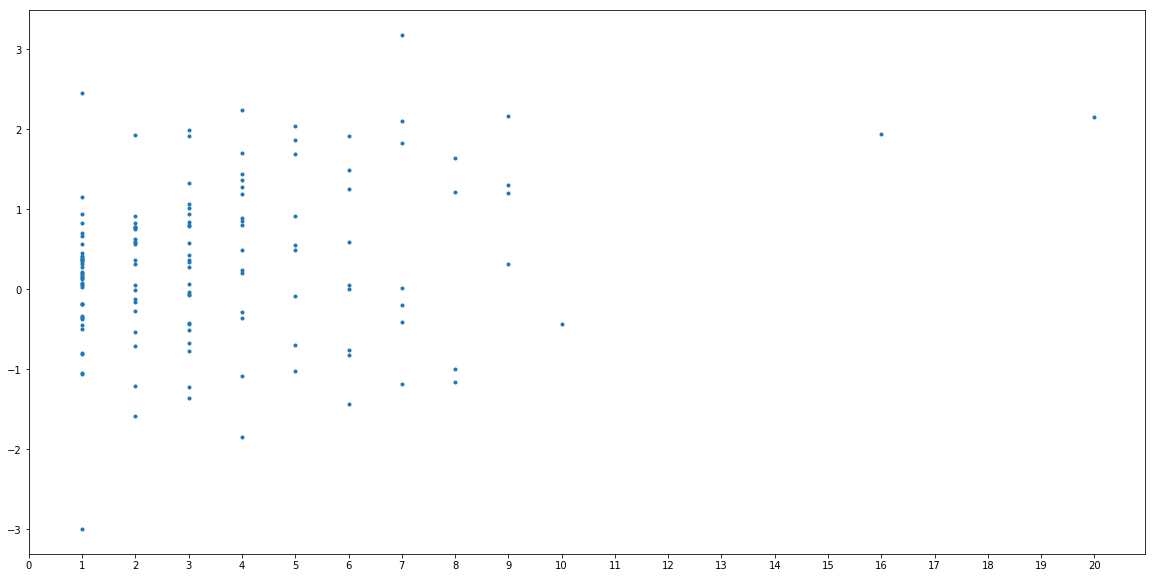

In [55]:
# We can see that there are no deviance residual values at zero! Checking the dataframe, we obtain NaN's.
plt.figure(figsize=(20,10))
plt.plot(galaxy_df['value'], galaxy_df['deviance_resid'], '.')
plt.xticks(np.linspace(0,20,21))
plt.show()

### d) How might you add to model (8.39) to get a better fit?

#### Possibly by using a zero-inflated Poisson regression model